In [2]:
# Import pandas, numPy, & dataset
import pandas as pd
import numpy as np
path = "C:\candidatesummaryaction1.csv"
seg = pd.read_csv(path)

In [3]:
# Drop unncessary columns
seg = seg.drop(columns = ['can_nam', 'can_off_dis', 'can_str1', 'can_str2', 'can_cit', 'can_zip', 'ind_ite_con', 'ind_uni_con', 'oth_com_con', 'tra_fro_oth_aut_com','can_loa', 'oth_loa', 'tot_loa', 'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com', 'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref','oth_com_ref','tot_con_ref', 'tot_dis', 'deb_owe_by_com', 'deb_owe_to_com'])

In [4]:
# Change blank values in the winner column to No (N)
seg['winner'] = seg['winner'].fillna('N')

In [5]:
# Drop non-numerical rows that have NA values
seg = seg.dropna(subset = ['can_inc_cha_ope_sea'])

In [6]:
# Fill in other applicable missing values with 0
seg = seg.fillna(0)

In [7]:
# Convert numerical values to float
# ind_con
seg['ind_con'] = seg.ind_con.str.replace(',', '')
seg['ind_con'] = seg.ind_con.str.replace('$', '')
seg['ind_con']= seg.ind_con.astype(float)
# par_com_con
seg['par_com_con'] = seg.par_com_con.str.replace(',', '')
seg['par_com_con'] = seg.par_com_con.str.replace('$', '')
seg['par_com_con'] = seg.par_com_con.astype(float)
# tot_con
seg['tot_con'] = seg.tot_con.str.replace(',', '')
seg['tot_con'] = seg.tot_con.str.replace('$', '')
seg['tot_con'] = seg.tot_con.astype(float)
# ope_exp
seg['ope_exp'] = seg.ope_exp.str.replace(',', '')
seg['ope_exp'] = seg.ope_exp.str.replace('$', '')
seg['ope_exp'] = seg.ope_exp.str.replace('(', '-')
seg['ope_exp'] = seg.ope_exp.str.replace(')', ' ')
seg['ope_exp'] = seg.ope_exp.astype(float)
# can_con
seg['can_con'] = seg.can_con.str.replace(',', '')
seg['can_con'] = seg.can_con.str.replace('$', '')
seg['can_con'] = seg.can_con.astype(float)
# oth_dis
seg['oth_dis'] = seg.oth_dis.str.replace(',', '')
seg['oth_dis'] = seg.oth_dis.str.replace('$', '')
seg['oth_dis'] = seg.oth_dis.str.replace('(', '-')
seg['oth_dis'] = seg.oth_dis.str.replace(')', '')
seg['oth_dis'] = seg.oth_dis.astype(float)
# cas_on_han_beg_of_per
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace(',', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace('$', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace('(', '-')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.str.replace(')', '')
seg['cas_on_han_beg_of_per'] = seg.cas_on_han_beg_of_per.astype(float)
# cas_on_han_clo_of_per
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace(',', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace('$', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace('(', '-')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.str.replace(')', '')
seg['cas_on_han_clo_of_per'] = seg.cas_on_han_clo_of_per.astype(float)
# net_con
seg['net_con'] = seg.net_con.str.replace(',', '')
seg['net_con'] = seg.net_con.str.replace('$', '')
seg['net_con'] = seg.net_con.str.replace('(', '-')
seg['net_con'] = seg.net_con.str.replace(')', '')
seg['net_con'] = seg.net_con.astype(float)
# net_ope_exp
seg['net_ope_exp'] = seg.net_ope_exp.str.replace(',', '')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace('$', '')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace('(', '-')
seg['net_ope_exp'] = seg.net_ope_exp.str.replace(')', '')
seg['net_ope_exp'] = seg.net_ope_exp.astype(float)

In [8]:
# Fill newly exposed NA values with 0
seg = seg.fillna(0)

In [9]:
# Briefly review the data
seg.head(10)

,can_id,can_off,can_off_sta,can_par_aff,can_inc_cha_ope_sea,can_sta,ind_con,par_com_con,can_con,tot_con,ope_exp,oth_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,H,GA,REP,INCUMBENT,GA,601274.50,0.00,0.0,1074949.50,908518.98,70000.00,60109.57,175613.35,1074949.50,907156.21,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,H,PA,DEM,CHALLENGER,PA,1114711.02,0.00,0.0,1417545.22,1300557.53,2200.00,0.00,105687.23,1406719.06,1298831.83,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,H,FL,REP,OPEN,FL,542105.38,0.00,2700.0,650855.38,656642.76,19000.00,0.00,35645.09,650855.38,656210.29,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,H,MT,REP,INCUMBENT,MT,4317331.58,3545.32,0.0,4980915.41,5073110.33,43548.00,83815.78,399122.61,4938943.74,5055942.15,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,H,CA,DEM,INCUMBENT,CA,897123.61,0.00,0.0,1205863.61,953436.94,150540.00,83690.60,181338.23,1197676.61,949488.98,1/1/2015,10/19/2016,Y,277390.0
5,H6NC04037,H,NC,DEM,INCUMBENT,NC,328804.52,300.00,0.0,728854.52,435688.13,236885.00,216409.21,274287.84,725854.52,430826.04,1/1/2015,10/19/2016,Y,275501.0
6,H2WI02124,H,WI,DEM,INCUMBENT,WI,393873.83,28.54,0.0,970547.37,445465.15,300275.96,187549.87,412220.80,970385.04,445438.15,1/1/2015,10/19/2016,Y,273520.0
7,H2MA09072,H,MA,DEM,INCUMBENT,MA,767049.56,0.00,0.0,1092269.56,464636.23,28360.00,406586.74,1010654.62,1092218.56,459790.68,1/1/2015,10/19/2016,Y,267944.0
8,H6OR02116,H,OR,REP,INCUMBENT,OR,969437.03,0.00,0.0,3012350.64,1937694.04,921525.73,997259.73,1264468.82,3004650.64,1911215.54,1/1/2015,10/19/2016,Y,267179.0
9,H2MA04073,H,MA,DEM,INCUMBENT,MA,1938192.38,0.00,0.0,2797967.38,1539411.68,0.00,1400008.58,2858165.71,2784362.26,1537844.39,1/1/2015,10/19/2016,Y,261356.0


In [10]:
from matplotlib import pyplot as plt
#make the plots show up inline
%matplotlib inline 
import seaborn as sns
# set style
plt.style.use('fivethirtyeight')

### 1 - Barplot/countplot investigating the number of candidates running for each office. 


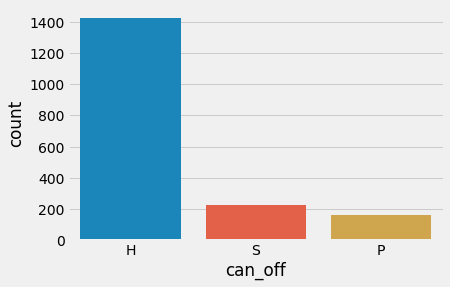

In [11]:
sns.countplot(x = 'can_off',data = seg)
plt.show()

### 2 - Scatterplot investigating the correlation between net contribution and net operating expenditures. 

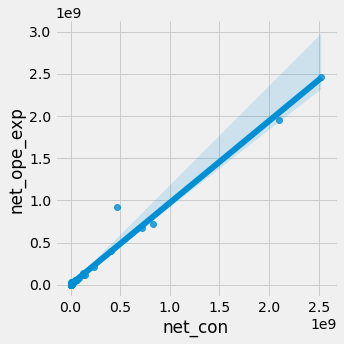

In [12]:
sns.lmplot(x = 'net_con',y = 'net_ope_exp',data = seg)   
plt.show()

### 3 - Catplot investigating the net contribution between winners and losers.  

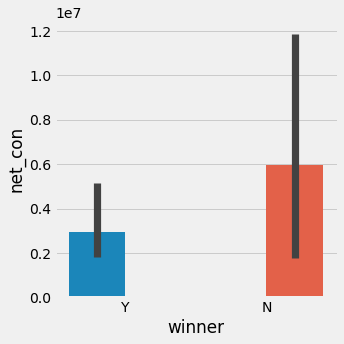

In [23]:
p = sns.catplot(x = 'winner', y = 'net_con', data = seg, hue = 'winner', kind = 'bar')

### 4 - Heatmap to explore correlations to further investigate. 

In [63]:
corr = seg.corr()
corr

,ind_con,par_com_con,can_con,tot_con,ope_exp,oth_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,votes
ind_con,1.000000,0.067535,0.180618,0.998509,0.973254,0.049440,0.041631,0.778825,0.979856,0.986707,-0.012406
par_com_con,0.067535,1.000000,0.000738,0.079517,0.067210,0.016746,0.144872,0.127174,0.022237,0.023386,-0.023225
can_con,0.180618,0.000738,1.000000,0.213050,0.300408,-0.009450,-0.011555,0.176723,0.129505,0.198980,-0.006230
tot_con,0.998509,0.079517,0.213050,1.000000,0.976642,0.066530,0.062275,0.791034,0.973802,0.982930,0.007426
ope_exp,0.973254,0.067210,0.300408,0.976642,1.000000,0.033920,0.051803,0.812118,0.922889,0.960042,-0.009192
oth_dis,0.049440,0.016746,-0.009450,0.066530,0.033920,1.000000,0.466558,0.300749,0.032050,0.027379,0.206340
cas_on_han_beg_of_per,0.041631,0.144872,-0.011555,0.062275,0.051803,0.466558,1.000000,0.369489,0.009049,0.009101,0.146165
cas_on_han_clo_of_per,0.778825,0.127174,0.176723,0.791034,0.812118,0.300749,0.369489,1.000000,0.684265,0.707994,0.112561
net_con,0.979856,0.022237,0.129505,0.973802,0.922889,0.032050,0.009049,0.684265,1.000000,0.990039,-0.022312
net_ope_exp,0.986707,0.023386,0.198980,0.982930,0.960042,0.027379,0.009101,0.707994,0.990039,1.000000,-0.025007


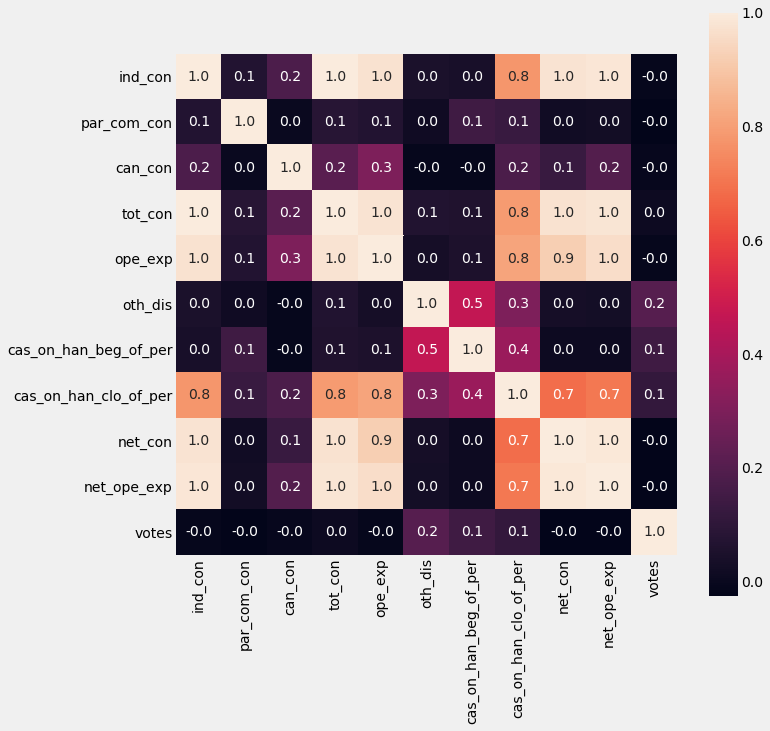

In [66]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='0.1f', square=True)
plt.show()